# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
from sklearn.model_selection import train_test_split

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

assert X_train.shape[0] == y_train.shape[0]
assert X_valid.shape[0] == y_valid.shape[0]
assert X_test.shape[0] == y_test.shape[0]

print("Number of training examples =", n_train)
print("Number of validating examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validating examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Visualizations will be shown in the notebook.
%matplotlib inline

In [4]:
# Import sign_names
df = pd.read_csv('signnames.csv')
sign_names = df[df.columns[1]].values
print(sign_names)

['Speed limit (20km/h)' 'Speed limit (30km/h)' 'Speed limit (50km/h)'
 'Speed limit (60km/h)' 'Speed limit (70km/h)' 'Speed limit (80km/h)'
 'End of speed limit (80km/h)' 'Speed limit (100km/h)'
 'Speed limit (120km/h)' 'No passing'
 'No passing for vehicles over 3.5 metric tons'
 'Right-of-way at the next intersection' 'Priority road' 'Yield' 'Stop'
 'No vehicles' 'Vehicles over 3.5 metric tons prohibited' 'No entry'
 'General caution' 'Dangerous curve to the left'
 'Dangerous curve to the right' 'Double curve' 'Bumpy road' 'Slippery road'
 'Road narrows on the right' 'Road work' 'Traffic signals' 'Pedestrians'
 'Children crossing' 'Bicycles crossing' 'Beware of ice/snow'
 'Wild animals crossing' 'End of all speed and passing limits'
 'Turn right ahead' 'Turn left ahead' 'Ahead only' 'Go straight or right'
 'Go straight or left' 'Keep right' 'Keep left' 'Roundabout mandatory'
 'End of no passing' 'End of no passing by vehicles over 3.5 metric tons']


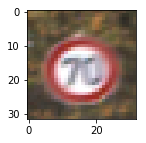

4 : Speed limit (70km/h)


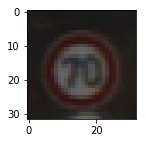

4 : Speed limit (70km/h)


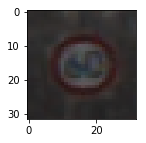

3 : Speed limit (60km/h)


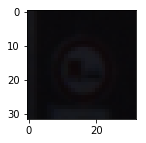

10 : No passing for vehicles over 3.5 metric tons


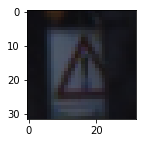

18 : General caution


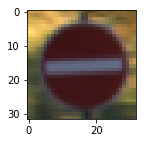

17 : No entry


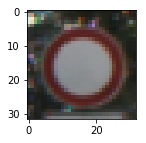

15 : No vehicles


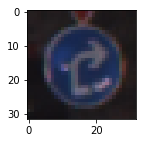

33 : Turn right ahead


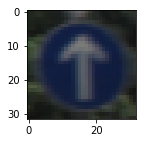

35 : Ahead only


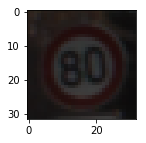

5 : Speed limit (80km/h)


In [5]:
# Checking some images and corresponding labels
def show_some_images(n):
    """
    show n many randmly selected images and print out labels
    """
    for i in np.random.randint(0, n_train, n):
        plt.figure(figsize = (2,2))
        plt.imshow(X_train[i])
        plt.show()
        print('{} : {}'.format(y_train[i], sign_names[y_train[i]]))
show_some_images(10)

Plot the count of each sign to see the distribution.
[(Source)](http://matplotlib.org/examples/statistics/histogram_demo_histtypes.html)

The samples are not evenly distributed in each categories. But the distribution are similar across train, valid and test datasets, which is good for the model.

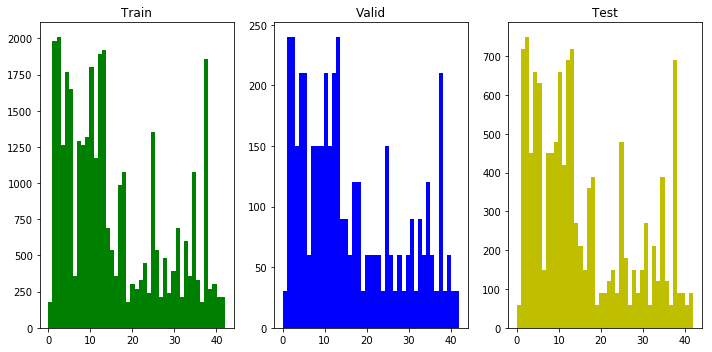

In [6]:
fig, (ax_train, ax_valid, ax_test) = plt.subplots(ncols=3, figsize=(10, 5))
ax_train.hist(y_train, n_classes, facecolor='g')
ax_train.set_title('Train')
ax_valid.hist(y_valid, n_classes, facecolor='b')
ax_valid.set_title('Valid')
ax_test.hist(y_test, n_classes, facecolor='y')
ax_test.set_title('Test')
fig.tight_layout()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
from sklearn.utils import shuffle
import tensorflow as tf
import numpy as np

X_train, y_train = shuffle(X_train, y_train)


def preprocess(X, grayscale = False):
    if grayscale:
        return np.mean((X - 128.) / 128., axis = 3, keepdims = True)
    return (X - 128.) / 128.

X_train = preprocess(X_train, grayscale=True)
X_valid = preprocess(X_valid, grayscale=True)
X_test = preprocess(X_test, grayscale=True)
image_shape = X_train[0].shape

### Model Architecture

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_stride, pool_ksize, pool_stride, keep_prob):
    """
    Apply convolution then max pooling to x_tensor
    Parameters:
        x_tensor: TensorFlow Tensor
        conv_num_outputs: Int, number of output layers
        conv_ksize: 2D Tuple, kernal size for convolutional layer
        conv_strides: Int;        pool_ksize: Int
        pool_strides: Int;        keep_prob: float
    Return: 
        A tensor that represents convolution and max pooling of x_tensor
    """
    weight = tf.Variable(tf.truncated_normal(list(conv_ksize)+[x_tensor.get_shape().as_list()[-1]]+[conv_num_outputs], 
                                             stddev=0.1))
    bias = tf.Variable(tf.ones(conv_num_outputs)*0.1)
    layer = tf.nn.conv2d(x_tensor, weight, strides = (1, conv_stride, conv_stride, 1), padding = 'VALID')
    layer = tf.nn.bias_add(layer, bias)
    
    layer = tf.nn.relu(layer)
    layer = tf.nn.dropout(layer, keep_prob = keep_prob)
    
    layer = tf.nn.max_pool(layer, ksize = (1, pool_ksize, pool_ksize, 1), strides = (1,pool_stride, pool_stride, 1),
                           padding = 'VALID')
    layer = tf.nn.dropout(layer, keep_prob = keep_prob)
    return layer

def fully_conn(x_tensor, num_outputs, keep_prob):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    Parameters:
        x_tensor: A 2-D tensor where the first dimension is batch size.
        num_outputs: Int, number of output that the new tensor should be.
    Return: 
        A 2-D tensor where the second dimension is num_outputs.
    """
    fc_weight = tf.Variable(tf.truncated_normal([x_tensor.get_shape().as_list()[1], num_outputs], stddev=0.1))
    fc_bias = tf.Variable(tf.ones(num_outputs)*0.1)
    layer = tf.add(tf.matmul(x_tensor, fc_weight), fc_bias)
    layer = tf.nn.relu(layer)
    return tf.nn.dropout(layer, keep_prob = keep_prob)

def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    Parameters: 
        x_tensor: A 2-D tensor where the first dimension is batch size.
        num_outputs: Int, number of output that the new tensor should be.
    Return: 
        A 2-D tensor where the second dimension is num_outputs.
    """
    out_weight = tf.Variable(tf.truncated_normal([x_tensor.get_shape().as_list()[1], num_outputs], stddev=0.1))
    out_bias = tf.Variable(tf.ones(num_outputs)*0.1)
    return tf.add(tf.matmul(x_tensor, out_weight), out_bias)

In [9]:
from tensorflow.contrib.layers import flatten

def LeNet(x, keep_prob):
    """
    Define the network with convolution, max pooling then fully connected layers.
    """
    
    conv1 = conv2d_maxpool(x, 18, (5, 5), 1, 2, 2, keep_prob)
    conv2 = conv2d_maxpool(conv1, 64, (5, 5), 1, 2, 2, keep_prob)
    
    flat = flatten(conv2)
    
    fc1 = fully_conn(flat, 360, keep_prob)
    fc2 = fully_conn(fc1, 252, keep_prob)
    fc3 = fully_conn(fc2, 148, keep_prob)  
    
    logits = output(fc3, n_classes)
    
    return (logits, conv1, conv2)

In [10]:
tf.reset_default_graph()
learnrate = 0.001

# Inputs
x = tf.placeholder(tf.float32, shape = (None,) + image_shape, name = 'x')
y = tf.placeholder(tf.int32, shape = (None), name = 'y')
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32, name = 'keep_prob')

# Model
logits, conv1, conv2 = LeNet(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
loss_operation = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y))
optimizer = tf.train.AdamOptimizer(learnrate)
training_operation = optimizer.minimize(loss_operation)

# Accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [11]:
def evaluate(X_data, y_data, session, accuracy_operation, BATCH_SIZE):
    num_examples = len(X_data)
    total_accuracy = 0
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = session.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [12]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.

EPOCHS = 350
BATCH_SIZE = 1024
keep_prob_value = 0.8
model_dir = './lenet'

In [13]:
all_valid_acc = np.zeros(EPOCHS, dtype=np.float)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print('Training...')
    for epoch in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: keep_prob_value})
        valid_acc = evaluate(X_valid, y_valid, sess, accuracy_operation, BATCH_SIZE)
        all_valid_acc[epoch] = valid_acc
#         if epoch % 10 == 9:
        print('Epoch {:>3}:   '.format(epoch + 1), end='')
        loss = sess.run(loss_operation, feed_dict = {x: batch_x, y: batch_y, keep_prob: 1.})
        print('Last Batch Train Loss   {:>7.2}   '.format(loss), end='')
        print('Valid Accuracy   {:>6.2%}'.format(valid_acc))

Training...
Epoch   1:   Last Batch Train Loss       3.4   Valid Accuracy   10.50%
Epoch   2:   Last Batch Train Loss       2.7   Valid Accuracy   22.95%
Epoch   3:   Last Batch Train Loss       1.7   Valid Accuracy   51.79%
Epoch   4:   Last Batch Train Loss      0.98   Valid Accuracy   72.29%
Epoch   5:   Last Batch Train Loss      0.58   Valid Accuracy   80.57%
Epoch   6:   Last Batch Train Loss      0.52   Valid Accuracy   84.67%
Epoch   7:   Last Batch Train Loss      0.34   Valid Accuracy   87.91%
Epoch   8:   Last Batch Train Loss      0.25   Valid Accuracy   89.59%
Epoch   9:   Last Batch Train Loss      0.17   Valid Accuracy   89.57%
Epoch  10:   Last Batch Train Loss      0.15   Valid Accuracy   92.04%
Epoch  11:   Last Batch Train Loss      0.11   Valid Accuracy   92.52%
Epoch  12:   Last Batch Train Loss      0.11   Valid Accuracy   93.17%
Epoch  13:   Last Batch Train Loss     0.086   Valid Accuracy   94.29%
Epoch  14:   Last Batch Train Loss     0.071   Valid Accuracy   9

Epoch 117:   Last Batch Train Loss   0.00016   Valid Accuracy   96.78%
Epoch 118:   Last Batch Train Loss   0.00013   Valid Accuracy   96.39%
Epoch 119:   Last Batch Train Loss   9.8e-05   Valid Accuracy   97.28%
Epoch 120:   Last Batch Train Loss   8.7e-05   Valid Accuracy   96.92%
Epoch 121:   Last Batch Train Loss   0.00038   Valid Accuracy   97.10%
Epoch 122:   Last Batch Train Loss   0.00014   Valid Accuracy   96.39%
Epoch 123:   Last Batch Train Loss     8e-05   Valid Accuracy   96.46%
Epoch 124:   Last Batch Train Loss     9e-05   Valid Accuracy   97.03%
Epoch 125:   Last Batch Train Loss   6.4e-05   Valid Accuracy   97.01%
Epoch 126:   Last Batch Train Loss   9.3e-05   Valid Accuracy   96.69%
Epoch 127:   Last Batch Train Loss   4.5e-05   Valid Accuracy   97.28%
Epoch 128:   Last Batch Train Loss   0.00013   Valid Accuracy   96.58%
Epoch 129:   Last Batch Train Loss   0.00012   Valid Accuracy   96.53%
Epoch 130:   Last Batch Train Loss     7e-05   Valid Accuracy   96.69%
Epoch 

Epoch 233:   Last Batch Train Loss   9.8e-06   Valid Accuracy   97.07%
Epoch 234:   Last Batch Train Loss   1.9e-05   Valid Accuracy   96.92%
Epoch 235:   Last Batch Train Loss   3.6e-05   Valid Accuracy   97.19%
Epoch 236:   Last Batch Train Loss     8e-06   Valid Accuracy   97.07%
Epoch 237:   Last Batch Train Loss   1.2e-05   Valid Accuracy   96.87%
Epoch 238:   Last Batch Train Loss     3e-05   Valid Accuracy   96.76%
Epoch 239:   Last Batch Train Loss   8.9e-06   Valid Accuracy   96.78%
Epoch 240:   Last Batch Train Loss   1.2e-05   Valid Accuracy   96.87%
Epoch 241:   Last Batch Train Loss   1.8e-05   Valid Accuracy   95.99%
Epoch 242:   Last Batch Train Loss     2e-05   Valid Accuracy   96.80%
Epoch 243:   Last Batch Train Loss   2.1e-05   Valid Accuracy   97.14%
Epoch 244:   Last Batch Train Loss   3.5e-05   Valid Accuracy   97.07%
Epoch 245:   Last Batch Train Loss   1.9e-05   Valid Accuracy   96.21%
Epoch 246:   Last Batch Train Loss   2.3e-05   Valid Accuracy   96.44%
Epoch 

Epoch 349:   Last Batch Train Loss   4.6e-06   Valid Accuracy   96.71%
Epoch 350:   Last Batch Train Loss   0.00013   Valid Accuracy   96.30%


Plot to find a point where the validation accuracy stop increasing.

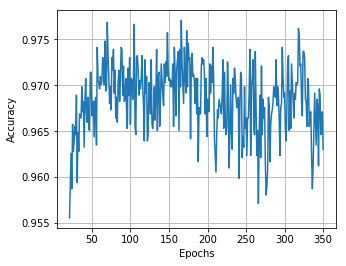

In [14]:
fig, axes = plt.subplots(ncols=1, figsize=(5, 4))
axes.plot(range(21, EPOCHS+1), all_valid_acc[20:])
axes.set_xlabel('Epochs')
axes.set_ylabel('Accuracy')
axes.grid(True)

It seems that `epoch = 150` is a good point to stop because the validation accuracy doesn't increase after this point.

Retrain the model with `epochs = 150` and save the model.

In [15]:
EPOCHS = 150
BATCH_SIZE = 1024
keep_prob_value = 0.8
model_dir = './traffic_sign_model'
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print('Training...')
    for epoch in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: keep_prob_value})
        if epoch % 10 == 0:
            print('Epoch {:>3}:   '.format(epoch + 1), end='')
            loss = sess.run(loss_operation, feed_dict = {x: batch_x, y: batch_y, keep_prob: 1.})
            print('Last Batch Train Loss   {:>7.2}   '.format(loss), end='')
            valid_acc = evaluate(X_valid, y_valid, sess, accuracy_operation, BATCH_SIZE)
            print('Valid Accuracy   {:>6.2%}'.format(valid_acc))
            
    # Save Model
    saver.save(sess, model_dir)
    print("Model saved")

Training...
Epoch   1:   Last Batch Train Loss       3.4   Valid Accuracy   13.13%
Epoch  11:   Last Batch Train Loss      0.12   Valid Accuracy   94.26%
Epoch  21:   Last Batch Train Loss     0.028   Valid Accuracy   95.60%
Epoch  31:   Last Batch Train Loss    0.0098   Valid Accuracy   95.83%
Epoch  41:   Last Batch Train Loss    0.0046   Valid Accuracy   96.39%
Epoch  51:   Last Batch Train Loss    0.0022   Valid Accuracy   96.58%
Epoch  61:   Last Batch Train Loss    0.0025   Valid Accuracy   96.19%
Epoch  71:   Last Batch Train Loss   0.00077   Valid Accuracy   96.46%
Epoch  81:   Last Batch Train Loss   0.00059   Valid Accuracy   96.44%
Epoch  91:   Last Batch Train Loss   0.00046   Valid Accuracy   96.28%
Epoch 101:   Last Batch Train Loss   0.00022   Valid Accuracy   97.01%
Epoch 111:   Last Batch Train Loss   0.00013   Valid Accuracy   96.17%
Epoch 121:   Last Batch Train Loss    0.0003   Valid Accuracy   96.64%
Epoch 131:   Last Batch Train Loss   0.00019   Valid Accuracy   9

Restore model and test on test set.

In [16]:
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, model_dir)
    test_acc = evaluate(X_test, y_test, sess, accuracy_operation, BATCH_SIZE)
    print('Test Accuracy:  {:>6.2%}'.format(test_acc))

INFO:tensorflow:Restoring parameters from ./traffic_sign_model
Test Accuracy:  96.09%


In [17]:
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, model_dir)
    train_acc = evaluate(X_train, y_train, sess, accuracy_operation, BATCH_SIZE)
    valid_acc = evaluate(X_valid, y_valid, sess, accuracy_operation, BATCH_SIZE)
    print('Training Accuracy:  {:>6.2%}'.format(train_acc))
    print('Validation Accuracy:  {:>6.2%}'.format(valid_acc))

INFO:tensorflow:Restoring parameters from ./traffic_sign_model
Training Accuracy:  100.00%
Validation Accuracy:  97.10%


### Compute and Plot Accuracy, Precision, Recall and F1 Score for All 43 Classes

In [18]:
# Input for tf.metrics functions
predictions = tf.placeholder(tf.int32,shape = (None))
labels = tf.placeholder(tf.int32,shape = (None))

# Compute Accuracy, Precision and Recall using tf.metrics functions
acc, acc_op = tf.metrics.accuracy(labels, predictions)
pre, pre_op = tf.metrics.precision(labels, predictions)
rec, rec_op = tf.metrics.recall(labels, predictions)

# Save values in np_arrays
all_accs = np.zeros(n_classes, dtype=np.float)
all_pres = np.zeros(n_classes, dtype=np.float)
all_recs = np.zeros(n_classes, dtype=np.float)

with tf.Session() as sess:
    saver.restore(sess, model_dir)
    sess.run(tf.local_variables_initializer())
    test_prediction = sess.run(tf.argmax(logits, 1), feed_dict={x: X_test, keep_prob: 1.})
    for i in range(n_classes):
        all_accs[i] = sess.run(acc_op, feed_dict={labels: (y_test == i), 
                                                  predictions: (test_prediction == i)})
        all_pres[i] = sess.run(pre_op, feed_dict={labels: (y_test == i), 
                                                  predictions: (test_prediction == i)})
        all_recs[i] = sess.run(rec_op, feed_dict={labels: (y_test == i), 
                                                  predictions: (test_prediction == i)})
# Compute F1 scores
f1 = 2 * all_pres * all_recs / (all_pres + all_recs)

INFO:tensorflow:Restoring parameters from ./traffic_sign_model


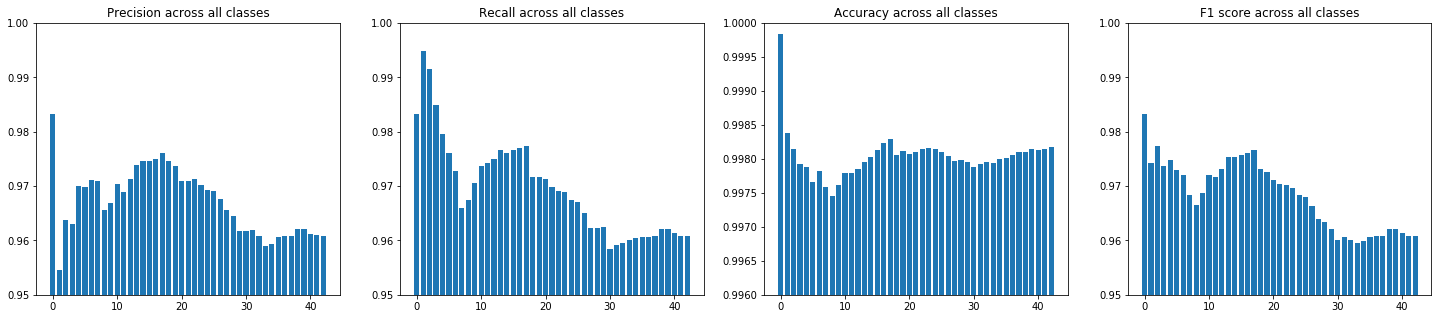

In [19]:
# Plot Precision, Recall, Accuracy, F1 Score
fig, (ax_pre, ax_rec, ax_acc, ax_f1) = plt.subplots(ncols=4, figsize=(25, 5))

ax_pre.bar(range(n_classes), all_pres)
ax_pre.set(ylim=[0.95,1.])
ax_pre.set_title('Precision across all classes')

ax_rec.bar(range(n_classes), all_recs)
ax_rec.set(ylim=[0.95,1.])
ax_rec.set_title('Recall across all classes')

ax_acc.bar(range(n_classes), all_accs)
ax_acc.set(ylim=[0.996,1.])
ax_acc.set_title('Accuracy across all classes')

ax_f1.bar(range(n_classes), f1)
ax_f1.set(ylim=[0.95,1.])
ax_f1.set_title('F1 score across all classes')

All 4 statistics seem pretty high across all classes.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [20]:
### Load the images and plot them here.

In [21]:
import os
import cv2
import matplotlib.image as mpimg

# Read images
img_dir = './online_images/'
img_names = [x for x in os.listdir(img_dir) if x.endswith('.jpg')]

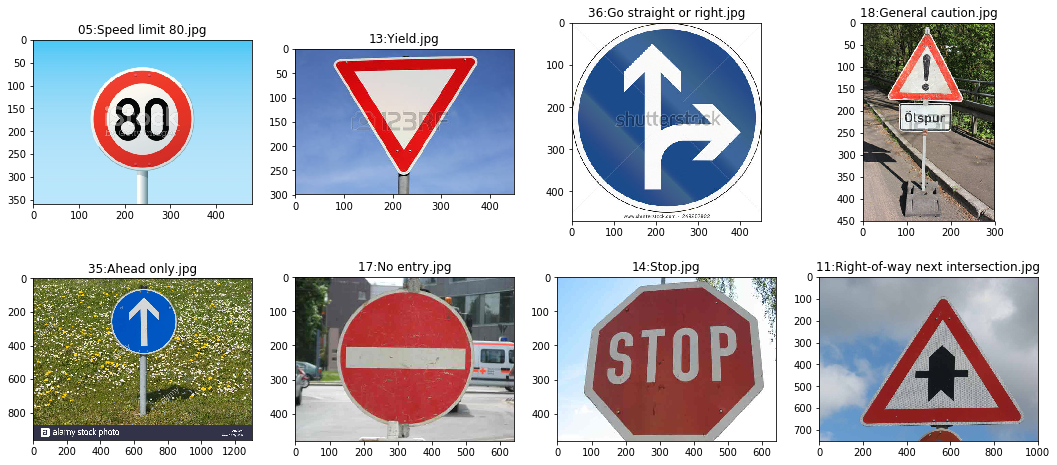

In [22]:
# Plot original images
original_imgs = np.array([mpimg.imread(os.path.join(img_dir, img_name)) for img_name in img_names])
plt.figure(1, figsize=(18,8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.title(img_names[i])
    plt.imshow(original_imgs[i])

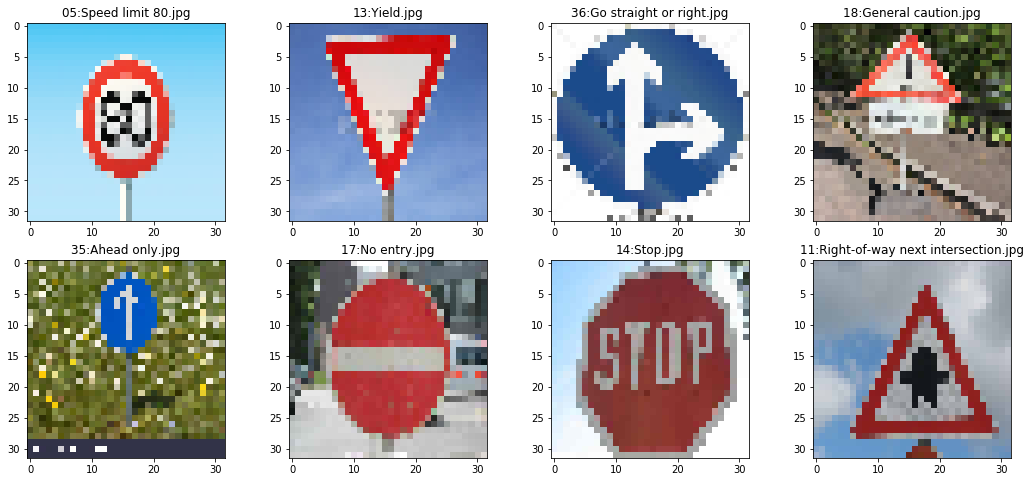

In [23]:
# Resize images into size (32, 32) and plot
imgs = np.array([cv2.resize(mpimg.imread(os.path.join(img_dir, img_name)), (32, 32)) for img_name in img_names])
plt.figure(1, figsize=(18,8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.title(img_names[i])
    plt.imshow(imgs[i])

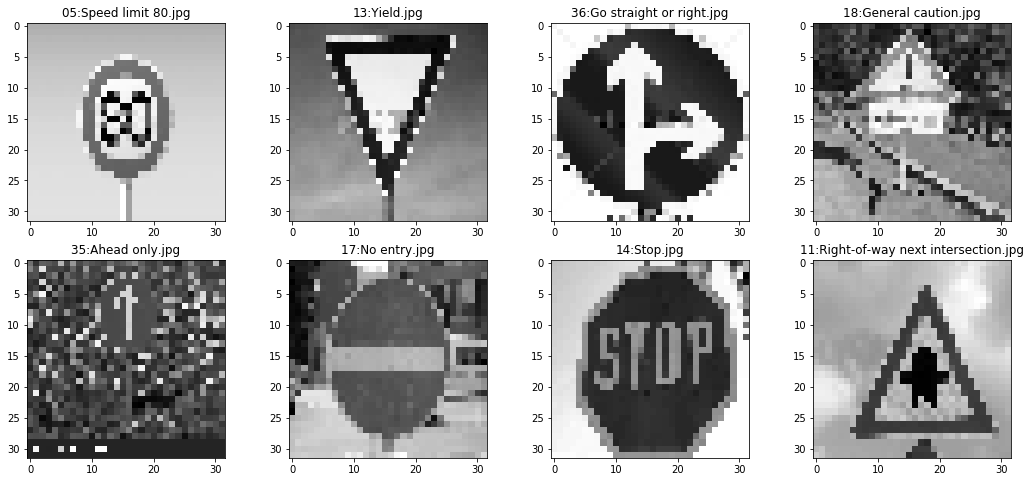

In [24]:
# Plot grayscale images
gray_imgs = np.mean(imgs, axis = 3)
plt.figure(1, figsize=(18,8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.title(img_names[i])
    plt.imshow(gray_imgs[i], cmap='gray')

### Predict the Sign Type for Each Image

In [25]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

In [26]:
# Preprocess online images
imgs = preprocess(imgs, grayscale = True)
# Predict and compute softmax values
predicted_softmax = tf.nn.softmax(logits)
predicted_classes = tf.argmax(predicted_softmax, 1)
with tf.Session() as sess:
    saver.restore(sess, model_dir)
    predicted_softmax = sess.run(predicted_softmax, feed_dict={x: imgs, keep_prob : 1.0})
    predicted_classes = sess.run(predicted_classes, feed_dict={x: imgs, keep_prob : 1.0})

INFO:tensorflow:Restoring parameters from ./traffic_sign_model


### Analyze Performance

In [27]:
### Calculate the accuracy for these 5 new images. 
correct = 0
for i, class_num in enumerate(predicted_classes):
    if class_num == int(img_names[i][:2]):
        result = 'Correct!'
        correct += 1
    else:
        result = 'Wrong'
    print("Class {:>3} : {:>37}  ------  {:6}".format(class_num, sign_names[class_num], result))
print('Accuracy  : {:.2%}'.format(correct/len(imgs)))

Class   5 :                  Speed limit (80km/h)  ------  Correct!
Class  13 :                                 Yield  ------  Correct!
Class  36 :                  Go straight or right  ------  Correct!
Class  33 :                      Turn right ahead  ------  Wrong 
Class  28 :                     Children crossing  ------  Wrong 
Class  17 :                              No entry  ------  Correct!
Class  14 :                                  Stop  ------  Correct!
Class  11 : Right-of-way at the next intersection  ------  Correct!
Accuracy  : 75.00%


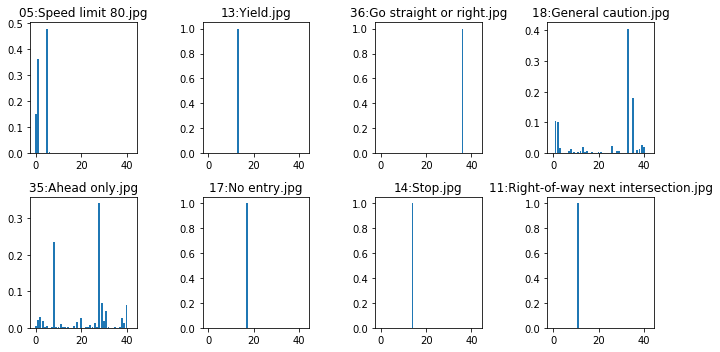

In [28]:
# Plot the distribution of softmax values.
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
for ax, softmax_value, title in zip(axes.flatten(), predicted_softmax, img_names):
    ax.bar(range(n_classes), softmax_value)
    ax.set_title(title)
fig.tight_layout()

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [29]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
with tf.Session() as sess:
    saver.restore(sess, model_dir)
    top_5_classes = sess.run(tf.nn.top_k(logits, 5), feed_dict={x: imgs, keep_prob : 1.0})
    print(top_5_classes.indices)

INFO:tensorflow:Restoring parameters from ./traffic_sign_model
[[ 5  1  0  6  2]
 [13 10 12 28 25]
 [36 35 25 38 22]
 [33 35  1  2 39]
 [28  8 29 40 31]
 [17 34  0 41  9]
 [14 33  3 13 17]
 [11 12 30 21 28]]


In [30]:
# Print the names of top-5 predicted classes
for i in range(len(imgs)):
    print('Image     {}'.format(img_names[i]))
    print('Predicted # : Name')
    for c in top_5_classes.indices[i]:
        print('{:>11} : {}'.format(c, sign_names[c]))
    print()

Image     05:Speed limit 80.jpg
Predicted # : Name
          5 : Speed limit (80km/h)
          1 : Speed limit (30km/h)
          0 : Speed limit (20km/h)
          6 : End of speed limit (80km/h)
          2 : Speed limit (50km/h)

Image     13:Yield.jpg
Predicted # : Name
         13 : Yield
         10 : No passing for vehicles over 3.5 metric tons
         12 : Priority road
         28 : Children crossing
         25 : Road work

Image     36:Go straight or right.jpg
Predicted # : Name
         36 : Go straight or right
         35 : Ahead only
         25 : Road work
         38 : Keep right
         22 : Bumpy road

Image     18:General caution.jpg
Predicted # : Name
         33 : Turn right ahead
         35 : Ahead only
          1 : Speed limit (30km/h)
          2 : Speed limit (50km/h)
         39 : Keep left

Image     35:Ahead only.jpg
Predicted # : Name
         28 : Children crossing
          8 : Speed limit (120km/h)
         29 : Bicycles crossing
         40 : Roun

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [31]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, keep_prob : 1.})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(8,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

Visualize the "Yield" Sign in conv1 layer
INFO:tensorflow:Restoring parameters from ./traffic_sign_model


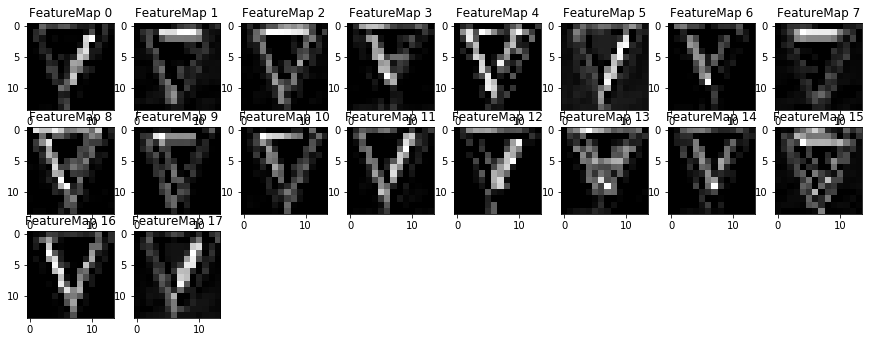

In [32]:
print('Visualize the \"Yield\" Sign in conv1 layer')
with tf.Session() as sess:
    saver.restore(sess, model_dir)
    outputFeatureMap(imgs[1:], conv1)

Visualize the "Go Straight or Right" Sign in conv1 layer
INFO:tensorflow:Restoring parameters from ./traffic_sign_model


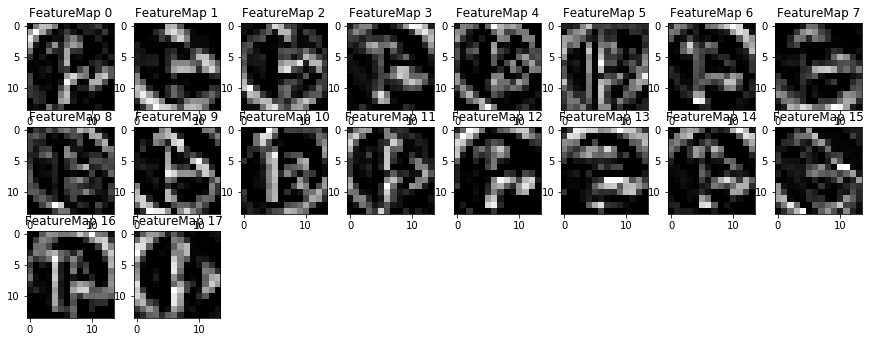

In [33]:
print('Visualize the \"Go Straight or Right\" Sign in conv1 layer')
with tf.Session() as sess:
    saver.restore(sess, model_dir)
    outputFeatureMap(imgs[2:], conv1)

Visualize conv2 layer
INFO:tensorflow:Restoring parameters from ./traffic_sign_model


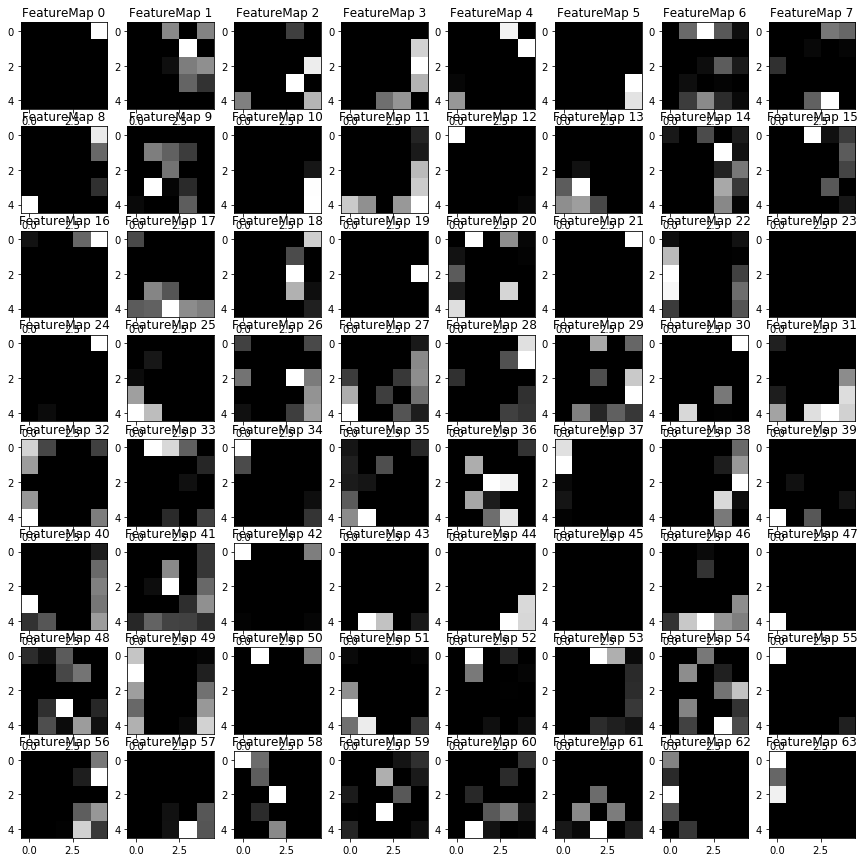

In [34]:
print('Visualize conv2 layer')
with tf.Session() as sess:
    saver.restore(sess, model_dir)
    outputFeatureMap(imgs, conv2)